# Part 2: Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'svg' # You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%matplotlib inline   # this statement allows the visuals to render within your Jupyter Notebook
sns.set()

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

UsageError: unrecognized arguments: # this statement allows the visuals to render within your Jupyter Notebook


In [2]:
pg13_movies = pd.read_csv("Movie_data.csv", index_col = 0)  #set our first column as the index
pg13_movies.head(5)

link_stub  \
Star Wars: Episode VII - The Force Awakens  /title/tt2488496/?ref_=bo_cso_table_1   
Avengers: Endgame                           /title/tt4154796/?ref_=bo_cso_table_2   
Avatar                                      /title/tt0499549/?ref_=bo_cso_table_3   
Black Panther                               /title/tt1825683/?ref_=bo_cso_table_4   
Avengers: Infinity War                      /title/tt4154756/?ref_=bo_cso_table_5   

                                                                                 title  \
Star Wars: Episode VII - The Force Awakens  Star Wars: Episode VII - The Force Awakens   
Avengers: Endgame                                                    Avengers: Endgame   
Avatar                                                                          Avatar   
Black Panther                                                            Black Panther   
Avengers: Infinity War                                          Avengers: Infinity War   

                                           rank  lifetime_gross rank_overall  \
Star Wars: Episode VII - The Force Awakens    1       936662225            1   
Avengers: Endgame                             2       858373000            2   
Avatar                                        3       760507625            3   
Black Panther                                 4       700426566            4   
Avengers: Infinity War                        5       678815482            5   

                                            year       budget  \
Star Wars: Episode VII - The Force Awakens  2015  247966675.0   
Avengers: Endgame                           2019  357115007.0   
Avatar                                      2009   77025481.0   
Black Panther                               2018  202003951.0   
Avengers: Infinity War                      2018  257698183.0   

                                                           domestic_distributor  \
Star Wars: Episode VII - The Force Awakens  Walt Disney Studios Motion Pictures   
Avengers: Endgame                           Walt Disney Studios Motion Pictures   
Avatar                                                    Twentieth Century Fox   
Black Panther                               Walt Disney Studios Motion Pictures   
Avengers: Infinity War                      Walt Disney Studios Motion Pictures   

                                           running_time earliest_release_date  \
Star Wars: Episode VII - The Force Awakens  2 hr 18 min     December 16, 2015   
Avengers: Endgame                            3 hr 1 min        April 24, 2019   
Avatar                                      2 hr 42 min     December 16, 2009   
Black Panther                               2 hr 14 min     February 13, 2018   
Avengers: Infinity War                      2 hr 29 min        April 25, 2018   

                                                                                  genres  \
Star Wars: Episode VII - The Force Awakens             ['Action', 'Adventure', 'Sci-Fi']   
Avengers: Endgame                             ['Action', 'Adventure', 'Drama', 'Sci-Fi']   
Avatar                                      ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']   
Black Panther                                          ['Action', 'Adventure', 'Sci-Fi']   
Avengers: Infinity War                                 ['Action', 'Adventure', 'Sci-Fi']   

                                             MPAA  
Star Wars: Episode VII - The Force Awakens  PG-13  
Avengers: Endgame                           PG-13  
Avatar                                      PG-13  
Black Panther                               PG-13  
Avengers: Infinity War                      PG-13

### Step 1: read data, deal with missing values

In [3]:
pg13_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Star Wars: Episode VII - The Force Awakens to Bad News Bears
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   link_stub              1000 non-null   object 
 1   title                  1000 non-null   object 
 2   rank                   1000 non-null   object 
 3   lifetime_gross         1000 non-null   int64  
 4   rank_overall           1000 non-null   object 
 5   year                   1000 non-null   int64  
 6   budget                 999 non-null    float64
 7   domestic_distributor   1000 non-null   object 
 8   running_time           995 non-null    object 
 9   earliest_release_date  1000 non-null   object 
 10  genres                 1000 non-null   object 
 11  MPAA                   932 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 101.6+ KB


In [4]:
pg13_movies.columns

Index(['link_stub', 'title', 'rank', 'lifetime_gross', 'rank_overall', 'year',
       'budget', 'domestic_distributor', 'running_time',
       'earliest_release_date', 'genres', 'MPAA'],
      dtype='object')

In [5]:
pg13_movies.drop(['MPAA'], axis=1, inplace = True)
pg13_movies.dropna(inplace=True) 
pg13_movies.drop_duplicates(inplace=True)

#### (1)getting title length

In [6]:
pg13_movies['title_len'] = pg13_movies['title'].apply(lambda x: len(x.replace(' ', '')))

#### (2)convert change running time to minutes

In [7]:
def get_minutes(x):
    '''
    convert ".. hr .. min" to minutes
    eg: '2 hr 18 min' --> '138' minutes
    '''
    if len(x.split()) == 4:
        minutes = int(x.split()[0])*60 + int(x.split()[2])
    elif len(x.split()) == 2 and x.split()[-1] == 'min':
        minutes = int(x.split()[0])
    elif len(x.split()) == 2 and x.split()[-1] == 'hr':
        minutes = int(x.split()[0])*60
    return minutes

pg13_movies['running_time'] = pg13_movies['running_time'].apply(get_minutes)

#### (3) change data type for 'rank' & 'rank_overall' to 'int'

In [8]:
pg13_movies['rank'] = pg13_movies['rank'].str.replace(',', '').astype('int')

In [9]:
pg13_movies['rank_overall'] = pg13_movies['rank_overall'].str.replace(',', '').astype('int')

#### (3)deal with catogorical value - domestic_distributor

In [10]:
#only getting the value counts > 50 (5% of my data)
pg13_movies['domestic_distributor'].value_counts()[pg13_movies['domestic_distributor'].value_counts()>50]

Warner Bros.                           163
Universal Pictures                     146
Twentieth Century Fox                  117
Sony Pictures Entertainment (SPE)      111
Paramount Pictures                     111
Walt Disney Studios Motion Pictures     85
Lionsgate                               53
Name: domestic_distributor, dtype: int64

In [11]:
pg13_movies['domestic_distributor'].value_counts()[pg13_movies['domestic_distributor'].value_counts()>50].index
#type : pandas.core.indexes.base.Index

Index(['Warner Bros.', 'Universal Pictures', 'Twentieth Century Fox',
       'Sony Pictures Entertainment (SPE)', 'Paramount Pictures',
       'Walt Disney Studios Motion Pictures', 'Lionsgate'],
      dtype='object')

In [12]:
distributor_list = ['Warner Bros.', 'Universal Pictures', 'Others', 'Twentieth Century Fox',
       'Paramount Pictures', 'Sony Pictures Entertainment (SPE)',
       'Walt Disney Studios Motion Pictures', 'Lionsgate']

def distributor(x):
    if x not in distributor_list:
        x = 'Others'
    return x
        
pg13_movies['domestic_distributor'] = pg13_movies['domestic_distributor'].apply(distributor)

In [13]:
pg13_movies['domestic_distributor'].value_counts()

Others                                 208
Warner Bros.                           163
Universal Pictures                     146
Twentieth Century Fox                  117
Sony Pictures Entertainment (SPE)      111
Paramount Pictures                     111
Walt Disney Studios Motion Pictures     85
Lionsgate                               53
Name: domestic_distributor, dtype: int64

#### (4)Getting month info from 'earliest_release_date', and divided to 4 seasons 
Spring - March 1 to May 31; Summer - June 1 to August 31; Fall (autumn) - September 1 to November 30; Winter - December 1 to February 28 (February 29 in a leap year).

In [14]:
def get_season(x):
    '''
    extracting season information from 'earliest_release_date'
    '''
    season_check = {3:'spring', 4:'spring', 5: 'spring',
                   6: 'summer', 7:'summer', 8:'summer',
                   9:'fall', 10:'fall', 11:'fall',
                   12:'winter', 1:'winter', 2:'winter'}
    from datetime import datetime  #import datetime library
    month = pd.to_datetime(x).month
    return season_check[month]

pg13_movies['earliest_release_season'] = pg13_movies['earliest_release_date'].apply(get_season)

#### (5) deal with genres information  - we need to know if it's a 'Sci-Fi' movie

In [15]:
#from below, we can see 'Comedy', 'Romance', 'Action', 'Advenrure' seems highly apperance, so I will manually get dummies for those 4 columns
pg13_movies.genres.value_counts().head(20) 

['Comedy', 'Romance']                            60
['Action', 'Adventure', 'Sci-Fi']                59
['Comedy', 'Drama', 'Romance']                   59
['Comedy']                                       36
['Action', 'Adventure', 'Thriller']              28
['Comedy', 'Drama']                              28
['Drama', 'Romance']                             26
['Action', 'Adventure', 'Sci-Fi', 'Thriller']    24
['Drama']                                        20
['Action', 'Adventure', 'Fantasy']               20
['Action', 'Adventure', 'Fantasy', 'Sci-Fi']     16
['Action', 'Comedy', 'Crime']                    13
['Action', 'Thriller']                           13
['Action', 'Crime', 'Thriller']                  12
['Comedy', 'Crime']                              12
['Horror', 'Mystery', 'Thriller']                12
['Comedy', 'Sport']                              10
['Action', 'Adventure', 'Comedy', 'Sci-Fi']      10
['Biography', 'Drama']                           10
['Drama', 'H

In [16]:
def check_comedy(x):
    if 'Comedy' in x:
        return 1
    else:
        return 0
pg13_movies['genre_comedy'] = pg13_movies['genres'].apply(check_comedy)

In [17]:
def check_romance(x):
    if 'Romance' in x:
        return 1
    else:
        return 0
pg13_movies['genre_romance'] = pg13_movies['genres'].apply(check_romance)

In [18]:
def check_action(x):
    if 'Action' in x:
        return 1
    else:
        return 0
pg13_movies['genre_action'] = pg13_movies['genres'].apply(check_action)

In [19]:
def check_adventure(x):
    if 'Adventure' in x:
        return 1
    else:
        return 0
pg13_movies['genre_adventure'] = pg13_movies['genres'].apply(check_adventure)

In [20]:
pg13_movies.columns

Index(['link_stub', 'title', 'rank', 'lifetime_gross', 'rank_overall', 'year',
       'budget', 'domestic_distributor', 'running_time',
       'earliest_release_date', 'genres', 'title_len',
       'earliest_release_season', 'genre_comedy', 'genre_romance',
       'genre_action', 'genre_adventure'],
      dtype='object')

In [21]:
#create new dataframe, which doesn't include 'link_stub', 'title', 'earliest release date', 'genres'
movies = pg13_movies[['year',
       'budget', 'running_time','title_len',
       'earliest_release_season','domestic_distributor', 'genre_comedy', 'genre_romance',
       'genre_action', 'genre_adventure', 'lifetime_gross']]

In [22]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, Star Wars: Episode VII - The Force Awakens to Bad News Bears
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     994 non-null    int64  
 1   budget                   994 non-null    float64
 2   running_time             994 non-null    int64  
 3   title_len                994 non-null    int64  
 4   earliest_release_season  994 non-null    object 
 5   domestic_distributor     994 non-null    object 
 6   genre_comedy             994 non-null    int64  
 7   genre_romance            994 non-null    int64  
 8   genre_action             994 non-null    int64  
 9   genre_adventure          994 non-null    int64  
 10  lifetime_gross           994 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 93.2+ KB


In [23]:
movies.describe()

year        budget  running_time   title_len  genre_comedy  \
count   994.000000  9.940000e+02    994.000000  994.000000    994.000000   
mean   2006.186117  3.068702e+07    114.622736   14.028169      0.402414   
std       8.386831  3.432369e+07     18.584326    7.389005      0.490631   
min    1984.000000  4.177900e+04     80.000000    2.000000      0.000000   
25%    2001.000000  1.278049e+07    101.000000    9.000000      0.000000   
50%    2007.000000  2.006127e+07    112.000000   12.000000      0.000000   
75%    2013.000000  3.563023e+07    126.000000   17.000000      1.000000   
max    2021.000000  3.571150e+08    202.000000   45.000000      1.000000   

       genre_romance  genre_action  genre_adventure  lifetime_gross  
count     994.000000    994.000000       994.000000    9.940000e+02  
mean        0.268612      0.414487         0.312877    1.072959e+08  
std         0.443461      0.492881         0.463898    1.026060e+08  
min         0.000000      0.000000         0.000000    3.286835e+07  
25%         0.000000      0.000000         0.000000    4.636652e+07  
50%         0.000000      0.000000         0.000000    6.903235e+07  
75%         1.000000      1.000000         1.000000    1.271703e+08  
max         1.000000      1.000000         1.000000    9.366622e+08

### Step 3: EDA

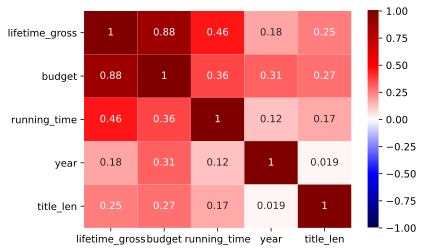

In [24]:
#only numercial columns first (doesn't include catogroical features for now)
sns.heatmap(movies[['lifetime_gross', 'budget', 'running_time', 'year', 'title_len']].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [25]:
#only check numerical first, found some columns are right-skew
sns.pairplot(movies[['lifetime_gross', 'budget', 'running_time', 'year', 'title_len']], height=1.2, aspect=1.5)

In [26]:
# the movies with longer title length is Series movies, which explains how it corelated with the lifetime_gross
movies[movies['title_len']>30].index

Index(['Star Wars: Episode VII - The Force Awakens',
       'Star Wars: Episode VIII - The Last Jedi',
       'Star Wars: Episode IX - The Rise of Skywalker',
       'Pirates of the Caribbean: Dead Man's Chest',
       'Transformers: Revenge of the Fallen',
       'Harry Potter and the Deathly Hallows: Part 2',
       'Star Wars: Episode III - Revenge of the Sith',
       'The Lord of the Rings: The Return of the King',
       'The Hunger Games: Mockingjay - Part 1',
       'Indiana Jones and the Kingdom of the Crystal Skull',
       'The Lord of the Rings: The Fellowship of the Ring',
       'Pirates of the Caribbean: At World's End',
       'Pirates of the Caribbean: The Curse of the Black Pearl',
       'Harry Potter and the Deathly Hallows: Part 1',
       'Harry Potter and the Order of the Phoenix',
       'The Twilight Saga: Breaking Dawn - Part 2',
       'The Hunger Games: Mockingjay - Part 2',
       'The Twilight Saga: Breaking Dawn - Part 1',
       'Captain America: The Win

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


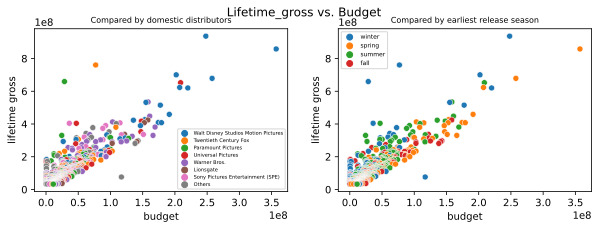

In [27]:
plt.figure(figsize=[10,3])
plt.suptitle('Lifetime_gross vs. Budget',fontsize = 12) 

plt.subplot(1,2,1)
sns.scatterplot(pg13_movies['budget'], pg13_movies['lifetime_gross'], data = pg13_movies, hue = pg13_movies['domestic_distributor'])
plt.legend(loc=0, prop={'size': 5})
plt.title('Compared by domestic distributors', fontsize = 8)
plt.xlabel('budget')
plt.ylabel('lifetime gross')

plt.subplot(1,2,2)
sns.scatterplot(pg13_movies['budget'], pg13_movies['lifetime_gross'], data = pg13_movies, hue = pg13_movies['earliest_release_season'])
plt.legend(loc=0, prop={'size': 6})
plt.title('Compared by earliest release season', fontsize = 8)
plt.xlabel('budget')
plt.ylabel('lifetime gross');

Notes: there's a strong linear relationship between 'budget' and 'lifetime_gross'

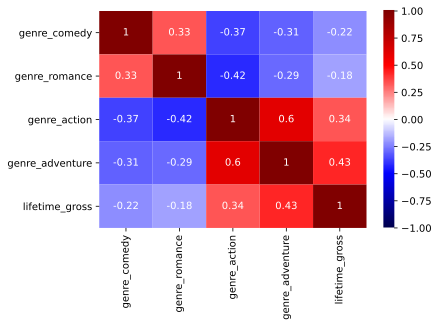

In [28]:
sns.heatmap(movies[['genre_comedy','genre_romance', 'genre_action', 'genre_adventure', 'lifetime_gross']].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

From heatmap it seems the 'adventure' & 'action' movies are positive corelated with lifetime_gross which may impove our model, however when add genres in our model, 'action' & 'Adventure' are not significant. Instead, 'comedy' is significant, it may because most of the 'action' & 'advanture' movies are with higher budget as well, and 'budget' is a strong estimator in our model.

In [29]:
movies[movies['lifetime_gross']>400000000].shape[0]  # There's 26 movies are with lifetime_gross greater than 400000000

26

In [30]:
#remove outliers as it affects our model
smaller_movies = movies[movies['lifetime_gross']<400000000]

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lifetime_gross', ylabel='Density'>

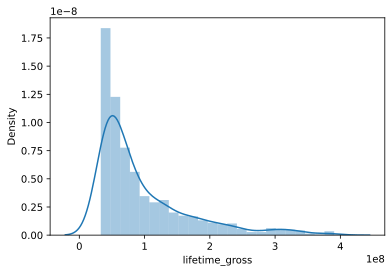

In [31]:
sns.distplot(movies[movies['lifetime_gross']<400000000]['lifetime_gross'])

In [32]:
smaller_movies.shape

(968, 11)

# Part 3:  Modeling with Sk learn & Statsmodels

In [33]:
#import libriaries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

### Step 1: Using simple validation to find the base model

In [34]:
X = smaller_movies[['budget', 'running_time', 'year']]
y = smaller_movies['lifetime_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)  #check coef_
print(lm.intercept_)  #check intercept
print(f'R2 on training set is {lm.score(X_train, y_train)}')
print(f'R2 on validation set is {lm.score(X_val, y_val)}')

[ 2.32258298e+00  6.06915886e+05 -9.47203700e+05]
1863390848.6419523
R2 on training set is 0.7474424328469472
R2 on validation set is 0.7027729365223734


### Step 2: using cross-validation for base model to get base validation score

In [35]:
X = smaller_movies[['budget', 'running_time', 'year']]
y = smaller_movies['lifetime_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=101)
#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)
kf = KFold(n_splits=5, shuffle=True, random_state = 101)
lm = LinearRegression()
lm.fit(X_train, y_train)
print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))

0.732854305420092


In [36]:
import statsmodels.api as sm
X = sm.add_constant(X)  #need to add constant
stats_lm = sm.OLS(y, X, data=smaller_movies)
results = stats_lm.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     721.0
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          4.70e-223
Time:                        12:57:36   Log-Likelihood:                -14577.
No. Observations:                 774   AIC:                         2.916e+04
Df Residuals:                     770   BIC:                         2.918e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.085e+09   3.32e+08      6.289      0.000    1.43e+09    2.74e+09
x1             2.3902      0.058     41.237      0.000       2.276       2.504
x2          6.817e+05   7.59e+04      8.984      0.000    5.33e+05    8.31e+05
x3         -1.062e+06   1.65e+05     -6.424      0.000   -1.39e+06   -7.38e+05
==============================================================================
Omnibus:                      244.026   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1375.495
Skew:                           1.307   Prob(JB):                    2.07e-299
Kurtosis:                       8.985   Cond. No.                     9.17e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.17e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

RMSE for training set is: 35740638.43239981
RMSE for validation set is: 39148670.37876901


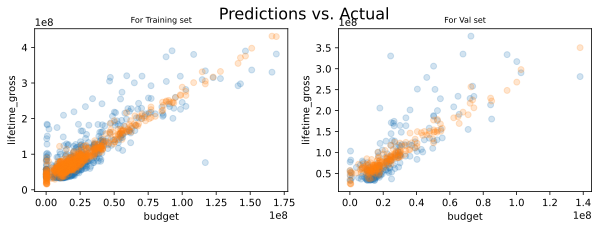

In [37]:
# Evaluate our baseline model
# Fitted vs. Actual
y_train_pred = lm.predict(X_train)
y_val_pred = lm.predict(X_val)

print(f'RMSE for training set is: {mean_squared_error(y_train, y_train_pred, squared = False)}')  
print(f'RMSE for validation set is: {mean_squared_error(y_val, y_val_pred, squared = False)}')

plt.figure(figsize=[10,3])
plt.suptitle('Predictions vs. Actual',fontsize = 16)  #plt.subtitle()

plt.subplot(1,2,1)
plt.scatter(X_train.budget,y_train, alpha = 0.2)
plt.scatter(X_train.budget,y_train_pred, alpha = 0.2)
plt.title('For Training set', fontsize = 8)
plt.xlabel('budget')
plt.ylabel('lifetime_gross')

plt.subplot(1,2,2)
plt.scatter(X_val.budget,y_val, alpha = 0.2)
plt.scatter(X_val.budget,y_val_pred, alpha = 0.2)
plt.title('For Val set', fontsize = 8)
plt.xlabel('budget')
plt.ylabel('lifetime_gross');

Text(336.9714285714286, 0.5, 'lifetime gross value')

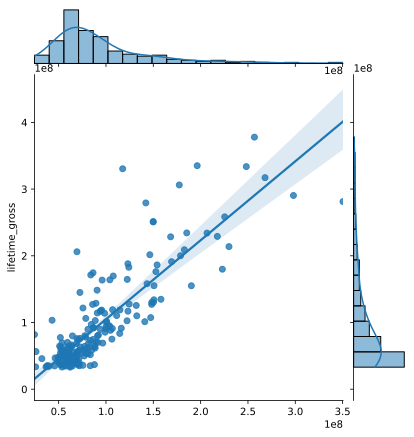

In [38]:
sns.jointplot(x=y_val_pred,y=y_val, kind='reg')  #plot
plt.xlabel('lifetime gross prediction value')
plt.ylabel('lifetime gross value')

### Step 3: Adding dummies to see if it can improve our model

In [39]:
smaller_movies = pd.get_dummies(smaller_movies, drop_first = True)

In [40]:
smaller_movies.columns

Index(['year', 'budget', 'running_time', 'title_len', 'genre_comedy',
       'genre_romance', 'genre_action', 'genre_adventure', 'lifetime_gross',
       'earliest_release_season_spring', 'earliest_release_season_summer',
       'earliest_release_season_winter', 'domestic_distributor_Others',
       'domestic_distributor_Paramount Pictures',
       'domestic_distributor_Sony Pictures Entertainment (SPE)',
       'domestic_distributor_Twentieth Century Fox',
       'domestic_distributor_Universal Pictures',
       'domestic_distributor_Walt Disney Studios Motion Pictures',
       'domestic_distributor_Warner Bros.'],
      dtype='object')

**Notes**

**genres** : 'genre_comedy','genre_romance', 'genre_action', 'genre_adventure'

**earliest release season**: 'earliest_release_season_spring', 'earliest_release_season_summer', 'earliest_release_season_winter'

**domestic_distributor**: 'domestic_distributor_Others','domestic_distributor_Paramount Pictures','domestic_distributor_Sony Pictures Entertainment (SPE)',
'domestic_distributor_Twentieth Century Fox','domestic_distributor_Universal Pictures','domestic_distributor_Walt Disney Studios Motion Pictures',
'domestic_distributor_Warner Bros.'

In [41]:
#adding genres
X1 = smaller_movies[['budget', 'running_time', 'year', 'genre_comedy']]
y1 = smaller_movies['lifetime_gross']

X, X_test, y, y_test = train_test_split(X1, y1, test_size=.2, random_state=20)
#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)
kf = KFold(n_splits=5, shuffle=True, random_state = 20)
print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))

0.7394484129592053


In [42]:
#adding seasons
X2 = smaller_movies[['budget', 'running_time', 'year', 'genre_comedy','earliest_release_season_spring', 'earliest_release_season_summer', 'earliest_release_season_winter']]
y2 = smaller_movies['lifetime_gross']

X, X_test, y, y_test = train_test_split(X2, y2, test_size=.2, random_state=20)
#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)
kf = KFold(n_splits=5, shuffle=True, random_state = 20)
print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))

0.7481714800320427


In [43]:
#adding domestic distributors
X3 = smaller_movies[['budget', 'running_time', 'year', 'domestic_distributor_Others','domestic_distributor_Paramount Pictures','domestic_distributor_Sony Pictures Entertainment (SPE)',
'domestic_distributor_Twentieth Century Fox','domestic_distributor_Universal Pictures','domestic_distributor_Walt Disney Studios Motion Pictures',
'domestic_distributor_Warner Bros.']]
y3 = smaller_movies['lifetime_gross']

X, X_test, y, y_test = train_test_split(X3, y3, test_size=.2, random_state=20)
#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)
kf = KFold(n_splits=5, shuffle=True, random_state = 20)
print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))

0.7391259361787531


In [44]:
#adding all categorical
X4 = smaller_movies[['budget', 'running_time', 'year', 'earliest_release_season_spring', 'earliest_release_season_summer', 'earliest_release_season_winter', 'domestic_distributor_Others','domestic_distributor_Paramount Pictures','domestic_distributor_Sony Pictures Entertainment (SPE)',
'domestic_distributor_Twentieth Century Fox','domestic_distributor_Universal Pictures','domestic_distributor_Walt Disney Studios Motion Pictures',
'domestic_distributor_Warner Bros.', 'genre_comedy']]
y4 = smaller_movies['lifetime_gross']

X, X_test, y, y_test = train_test_split(X4, y4, test_size=.2, random_state=20)
#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)
kf = KFold(n_splits=5, shuffle=True, random_state = 20)
print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))

0.7475872423687144


In [45]:
#take the highest r2 from above, check independent variable significant value
X2 = sm.add_constant(X2)  #need to add constant
stats_lm = sm.OLS(y2, X2, data=smaller_movies)
results = stats_lm.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifetime_gross   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     438.6
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          6.76e-294
Time:                        12:57:53   Log-Likelihood:                -18186.
No. Observations:                 968   AIC:                         3.639e+04
Df Residuals:                     960   BIC:                         3.643e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.954e+09   2.88e+08      6.783      0.000    1.39e+09    2.52e+09
budget                             2.4319      0.051     47.685      0.000       2.332       2.532
running_time                    7.353e+05   7.06e+04     10.419      0.000    5.97e+05    8.74e+05
year                           -1.004e+06   1.43e+05     -7.001      0.000   -1.29e+06   -7.23e+05
genre_comedy                    5.251e+06   2.54e+06      2.064      0.039    2.59e+05    1.02e+07
earliest_release_season_spring -6.374e+06   3.38e+06     -1.888      0.059    -1.3e+07    2.53e+05
earliest_release_season_summer  8.626e+06   3.27e+06      2.640      0.008    2.21e+06     1.5e+07
earliest_release_season_winter  1.138e+07   3.37e+06      3.375      0.001    4.76e+06     1.8e+07
==============================================================================
Omnibus:                      327.143   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2323.327
Skew:                           1.358   Prob(JB):                         0.00
Kurtosis:                      10.087   Cond. No.                     9.41e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 4: Prepare for Cross Validation step for candidate models

In [46]:
X2 = smaller_movies[['budget', 'running_time', 'year', 'genre_comedy','earliest_release_season_spring', 'earliest_release_season_summer', 'earliest_release_season_winter']]
y2 = smaller_movies['lifetime_gross']

X, X_test, y, y_test = train_test_split(X2, y2, test_size=.2, random_state=20)
#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

### Tunning Hyperparameter for Random Forest 

In [47]:
#Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [48]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

### Step 5: Model Selection: run the CV in more manual way for 4 candidate models

In [49]:
kf = KFold(n_splits=5, shuffle=True, random_state = 20)  #create Kfold
cv_lm_r2s_tr, cv_lm_r2s = [], []
cv_lm_poly_r2s_tr, cv_lm_poly_r2s = [], [] 
cv_lm_lasso_r2s_tr, cv_lm_lasso_r2s = [], []
rf_r2s_tr, rf_r2s = [], []

for train_ind, val_ind in kf.split(X,y):  #make k-fold into action
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #Model 1: Simple linear regression
    lm = LinearRegression()
    poly = PolynomialFeatures(degree=2) 
    lm_poly = LinearRegression()

    lm.fit(X_train, y_train)
    lm_preds = lm.predict(X_val)
    lm_val_rmse = mean_squared_error(y_val, lm_preds, squared = False)
    lm_val_mae = mean_absolute_error(y_val, lm_preds)
    cv_lm_r2s_tr.append(lm.score(X_train, y_train))
    cv_lm_r2s.append(lm.score(X_val, y_val))  #5 scores got attached to list
    
    #Model 2: Polynomial
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lm_poly.fit(X_train_poly, y_train)
    lm_poly_preds = lm_poly.predict(X_val_poly)
    lm_poly_val_rmse = mean_squared_error(y_val, lm_poly_preds, squared = False)
    lm_poly_val_mae = mean_absolute_error(y_val, lm_poly_preds)
    cv_lm_poly_r2s_tr.append(lm_poly.score(X_train_poly, y_train))
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    #Model 3: Regularization - LASSO
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)
    
    alphavec = 10**np.linspace(-2,2,200)
    lm_lasso = LassoCV(alphas = alphavec)
    lm_lasso.fit(X_train_poly_scaled,y_train)
    lm_lasso_preds = lm_lasso.predict(X_val_poly_scaled)
    lm_lasso_val_rmse = mean_squared_error(y_val, lm_lasso_preds, squared = False)
    lm_lasso_val_mae = mean_absolute_error(y_val, lm_lasso_preds)
    cv_lm_lasso_r2s_tr.append(lm_lasso.score(X_train_poly_scaled, y_train))
    cv_lm_lasso_r2s.append(lm_lasso.score(X_val_poly_scaled, y_val))
    
    #Model 4: RandomForest
    rf = RandomForestRegressor(bootstrap=True,
                           max_depth=80,
                           max_features= 3,
                           min_samples_leaf=4,
                           min_samples_split = 8,
                           n_estimators= 100, random_state = 42)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_val)
    rf_val_rmse = mean_squared_error(y_val, rf_preds, squared = False)
    rf_val_mae = mean_absolute_error(y_val, rf_preds)
    rf_r2s_tr.append(rf.score(X_train, y_train))
    rf_r2s.append(rf.score(X_val, y_val))

In [50]:
print('Simple regression val scores: ', cv_lm_r2s,'\n')
print('Polynomial val scores: ', cv_lm_poly_r2s, '\n')
print('Lasso val scores: ', cv_lm_lasso_r2s, '\n')

print(f'Simple mean cv training r^2: {np.mean(cv_lm_r2s_tr):.3f} +- {np.std(cv_lm_r2s_tr):.3f}')
print(f'Simple mean cv val r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Simple val RMSE:{lm_val_rmse}')
print(f'Simple val MAE: {lm_val_mae}')
print( '\n')

print(f'Polynomial mean cv training r^2: {np.mean(cv_lm_poly_r2s_tr):.3f} +- {np.std(cv_lm_poly_r2s_tr):.3f}')
print(f'Polynomial mean cv val r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')
print(f'Polynomial val RMSE: {lm_poly_val_rmse}')
print(f'Polynomial val MAE: {lm_poly_val_mae}')
print( '\n')

print(f'LASSO mean cv training r^2: {np.mean(cv_lm_lasso_r2s_tr):.3f} +- {np.std(cv_lm_lasso_r2s_tr):.3f}')
print(f'LASSO mean cv val r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}')
print(f'LASSO val RMSE: {lm_lasso_val_rmse}')
print(f'LASSO val MAE: {lm_lasso_val_mae}')
print( '\n')

print(f'RF mean cv training r^2: {np.mean(rf_r2s_tr):.3f} +- {np.std(rf_r2s_tr):.3f}')
print(f'RF mean cv val r^2: {np.mean(rf_r2s):.3f} +- {np.std(rf_r2s):.3f}')
print(f'RF val RMSE: {rf_val_rmse}')
print(f'RF val MAE: {rf_val_mae}')
print( '\n')
#so, in this situation, Ridge regression is much better than Simple linear regression  -- on validation
#if you want to check if it's overfitting, we need to get the score for train as well to compare. 
#the score below differ a lot is because outlier somthing, small dataset problem. investigate what made this problem.

Simple regression val scores:  [0.734910038999631, 0.7697946224794624, 0.8107129178823715, 0.7611982700040796, 0.6642415507946688] 

Polynomial val scores:  [0.7667637687822475, 0.754262775178673, 0.8316363667734487, 0.7720286155538514, 0.6972977058721972] 

Lasso val scores:  [0.7645154001001075, 0.7499088808123793, 0.8295927185828684, 0.7711069278176963, 0.7032778936113195] 

Simple mean cv training r^2: 0.758 +- 0.013
Simple mean cv val r^2: 0.748 +- 0.049
Simple val RMSE:41538596.22799076
Simple val MAE: 25389385.417961698


Polynomial mean cv training r^2: 0.790 +- 0.010
Polynomial mean cv val r^2: 0.764 +- 0.043
Polynomial val RMSE: 39440843.717235565
Polynomial val MAE: 24326173.620830692


LASSO mean cv training r^2: 0.790 +- 0.009
LASSO mean cv val r^2: 0.764 +- 0.041
LASSO val RMSE: 39049303.519672476
LASSO val MAE: 24228014.502844103


RF mean cv training r^2: 0.864 +- 0.009
RF mean cv val r^2: 0.770 +- 0.048
RF val RMSE: 39064999.01257186
RF val MAE: 23901101.042180877




In [51]:
lm_lasso.alpha_

1.552225357427048

In [52]:
lm_lasso.coef_

array([        0.        ,  64354616.09868296,  18202987.78807636,
       -18285172.71546404,   3159226.69210198,  -5795874.33500904,
        -2207334.42675896,   2601987.91235384, -19525676.88308844,
        21580001.36912451,  -7865004.79409379,   -333390.20366841,
         2447389.28738019,  10158093.32193002,  -2643302.69607428,
          905896.90672173, -11115756.42693536, -15937789.46516543,
       -23005907.15027149,   5935353.81863886,  24336698.22583675,
         8535029.87492859,  16689538.06061841,  30527042.53809172,
       -10688674.27126923, -16669995.1843216 ,  -1658338.97828754,
         -376503.0711751 ,    153656.30873463,    918162.59020638,
        -6528270.45307485,         0.        ,         0.        ,
         1157136.68346927,         0.        ,  -3780732.30448808])

### Step 6: Select the best model and get the test score

In [53]:
#Final model - random forest 
rf = RandomForestRegressor(bootstrap=True,
                           max_depth=80,
                           max_features= 3,
                           min_samples_leaf=4,
                           min_samples_split = 8,
                           n_estimators= 100, random_state = 42)
rf.fit(X, y)
print(f'Random Forest model Testing r^2: {rf.score(X_test, y_test)}')

Random Forest model Testing r^2: 0.776423121359095


### Step 7: Build random forest model on entire dataset
#### As RF is good with missing values and outliers, I want to use whole dataset to train the model and see how it performs

In [54]:
movies = pd.get_dummies(movies, drop_first = True)
X2 = movies[['budget', 'running_time', 'year', 'genre_comedy','earliest_release_season_spring', 'earliest_release_season_summer',
       'earliest_release_season_winter']]
y2 = movies['lifetime_gross']

X, X_test, y, y_test = train_test_split(X2, y2, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=.2, random_state=20)

rf = RandomForestRegressor(bootstrap=True,
                           max_depth=80,
                           max_features= 3,
                           min_samples_leaf=4,
                           min_samples_split = 8,
                           n_estimators= 100, random_state = 42)
rf.fit(X_train, y_train)
print(f'Random Forest model Training r^2: {rf.score(X_train, y_train)}')
print(f'Random Forest model Validation r^2: {rf.score(X_val, y_val)}')
print(f'Random Forest model Testing r^2: {rf.score(X_test, y_test)}')

Random Forest model Training r^2: 0.8463640188869912
Random Forest model Validation r^2: 0.8393346572350293
Random Forest model Testing r^2: 0.8393346572350293


### Step 8: Model Evaluation

MAE for training set is: 26104721.936355695
MAE for validation set is: 24873153.771090303


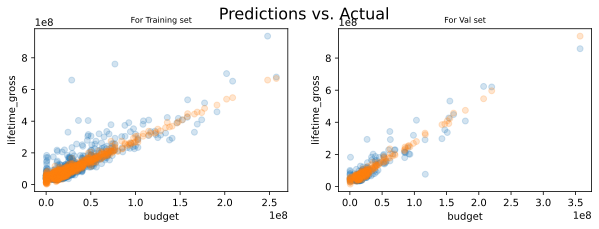

In [55]:
# Fitted vs. Actual
y_train_pred = lm.predict(X_train)
y_val_pred = lm.predict(X_val)

print(f'MAE for training set is: {mean_absolute_error(y_train, y_train_pred)}')  
print(f'MAE for validation set is: {mean_absolute_error(y_val, y_val_pred)}')

plt.figure(figsize=[10,3])
plt.suptitle('Predictions vs. Actual',fontsize = 16)  #plt.subtitle()

plt.subplot(1,2,1)
plt.scatter(X_train.budget,y_train, alpha = 0.2)
plt.scatter(X_train.budget,y_train_pred, alpha = 0.2)
plt.title('For Training set', fontsize = 8)
plt.xlabel('budget')
plt.ylabel('lifetime_gross')

plt.subplot(1,2,2)
plt.scatter(X_val.budget,y_val, alpha = 0.2)
plt.scatter(X_val.budget,y_val_pred, alpha = 0.2)
plt.title('For Val set', fontsize = 8)
plt.xlabel('budget')
plt.ylabel('lifetime_gross');

### Step 9: Explaine final model

In [56]:
rf.feature_importances_

array([0.75584413, 0.15299028, 0.05215988, 0.01550407, 0.0036398 ,
       0.007141  , 0.01272083])

<AxesSubplot:ylabel='feature'>

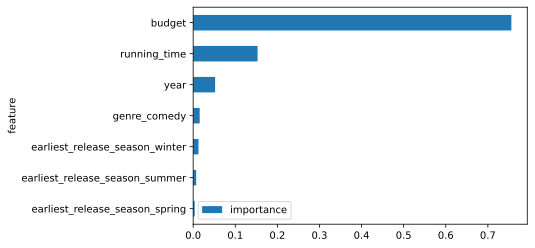

In [57]:
feat_imps = list(zip(X.columns,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

### Step 10: Test my model with real example 

In [58]:
#test 1
test_movie = X_test.sample(1)
test_movie

budget  running_time  year  genre_comedy  \
Armageddon  36089972.0           151  1998             0   

            earliest_release_season_spring  earliest_release_season_summer  \
Armageddon                               0                               1   

            earliest_release_season_winter  
Armageddon                               0

In [59]:
preds = rf.predict(test_movie)
preds

array([1.72956993e+08])

In [60]:
y_test['Armageddon']

201578182

In [61]:
#test 2
test_movie2 = X_test.sample(1)
test_movie2

budget  running_time  year  genre_comedy  \
Norbit  34195434.0           103  2007             1   

        earliest_release_season_spring  earliest_release_season_summer  \
Norbit                               0                               0   

        earliest_release_season_winter  
Norbit                               1

In [62]:
preds = rf.predict(test_movie2)
preds

array([1.09733112e+08])

In [63]:
y_test['Norbit']

95673607